# Predicting the sales Price of Houses

In [1]:
# importing the dependancies
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

##### importig the training dataset and perfom cleaning

In [2]:
#import the data
# the df_train dataset is for training the model
df_train = pd.read_csv("data/train.csv")

# the df_test dataset is for testing the model
df_test = pd.read_csv("data/test.csv")


In [3]:
df_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [4]:
# the shape of the dataframe
df_train.shape

(2197, 82)

In [5]:
#Finding Null values
df_null = df_train.isna().sum().sum()
df_null

11868

In [6]:
# calculating the number of cells in the dataset to find the percentage of null values in the entire dataset
df_cells = np.product(df_train.shape)
df_cells

180154

In [7]:
# percentage
df_null / df_cells * 100

6.587697192402056

In [8]:
# the cell above represents the percentage of Null values
# that means 6% of the datasets' data are null values
# this means the dataset has very many null values which may cause our model to perform poorly

In [9]:
# passing the data in a dataframe 
graph_data = {"Null values":[df_null],"Total Cell":[df_cells]}
graph_data

{'Null values': [11868], 'Total Cell': [180154]}

<Axes: >

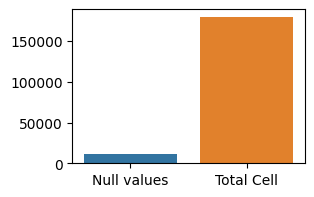

In [10]:
#plotting the data of nulls and cell
plt.figure(figsize = (3,2))
sns.barplot(graph_data)


In [11]:
# droping the null values will leave us with no data
# Hence we can not drop null values instead to fill them with 0
df_dropped_nulls = df_train.copy()
df_dropped_nulls.dropna()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [12]:
## here we fill all null values with 0 
## if the targetd column hass missing values you can fill it with the median as shown in the cells bellow
df_train = df_train.fillna(0)
df_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,0,Reg,Lvl,...,0,0,0,0,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,0,IR1,Lvl,...,0,0,0,0,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,0.0,14375,Pave,0,IR1,Lvl,...,0,0,0,0,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,0,Reg,Lvl,...,0,0,0,0,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,0,IR1,Lvl,...,0,0,0,0,0,5,2009,WD,Normal,167000


In [13]:
## Lets check if all the cells are still existing
df_train.shape

(2197, 82)

##### Building and training the model

In [14]:
# Selecting numerical features
num_features = df_train.select_dtypes(include=['number']).columns.tolist()

# Remove target variable
num_features.remove('SalePrice') 

# Filling missing values with median if any
df_train[num_features] = df_train[num_features].fillna(df_train[num_features].median())
df_test[num_features] = df_test[num_features].fillna(df_train[num_features].median())

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train[num_features])
X_test = scaler.transform(df_test[num_features])
y_train = df_train['SalePrice'].values

# y_train

In [15]:
# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse', 
    metrics=['mae']
)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

C:\Users\kaitale\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 38071693312.0000 - mae: 177967.7344 - val_loss: 42218409984.0000 - val_mae: 188063.7344
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39438348288.0000 - mae: 181154.7344 - val_loss: 42202398720.0000 - val_mae: 188031.3281
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39222804480.0000 - mae: 181043.2188 - val_loss: 42157019136.0000 - val_mae: 187942.4375
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 38860029952.0000 - mae: 180004.2500 - val_loss: 42065317888.0000 - val_mae: 187763.5156
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38769659904.0000 - mae: 180217.1094 - val_loss: 41900101632.0000 - val_mae: 187443.2344
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37492580352.0000 - mae: 177642.5625 - val_loss: 41647816704.0000 - val_mae: 186951.3125
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37709672448.0000 - mae: 177301.0000 - val_loss: 412770426

#### Visualizing the loss

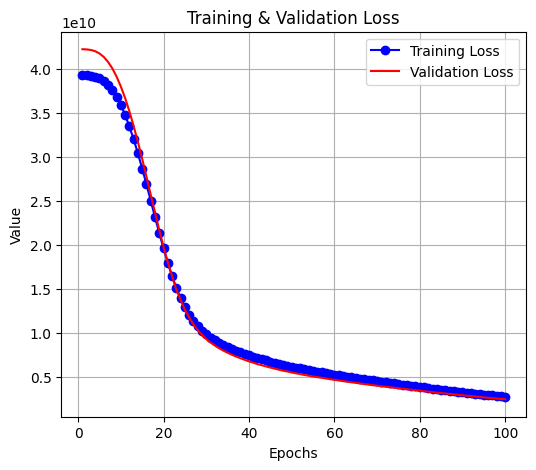

In [16]:
# calculating the lost

epoch = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(6,5))
# plt.subplots(1,2)
plt.plot(epoch, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epoch, history.history['val_loss'], '-r', label='Validation Loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [19]:

# Predict on test set
predictions = model.predict(X_test)
# print("Predictions:", predictions[:5])

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step 


In [20]:
df_test["SalesPrice"] = predictions.round()

In [21]:
# predicted data values
df_test.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalesPrice
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,112113.0
1,193,903206120,75,RL,63.0,7793,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,66763.0
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,182741.0
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,222290.0
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal,186655.0


#### Visualizing data

In [22]:
df_test.to_csv("predicted_output.csv")

In [23]:
df_test.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Text(0.5, 1.0, 'House Price by Year Build')

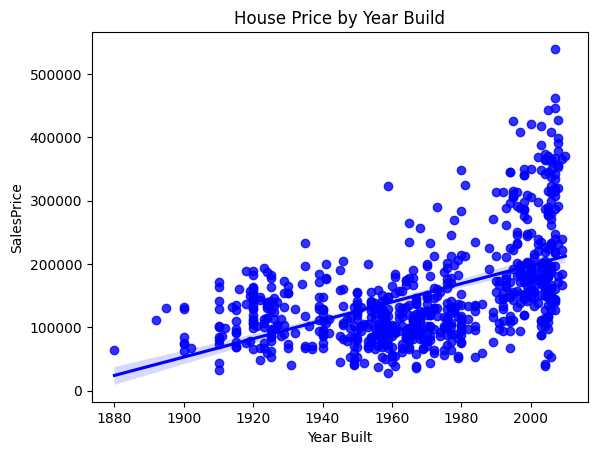

In [24]:
# years by price 

sns.regplot(y = df_test["SalesPrice"], x = df_test["Year Built"], color ='b')
plt.title("House Price by Year Build")


Text(0.5, 1.0, 'House Price by Central Air')

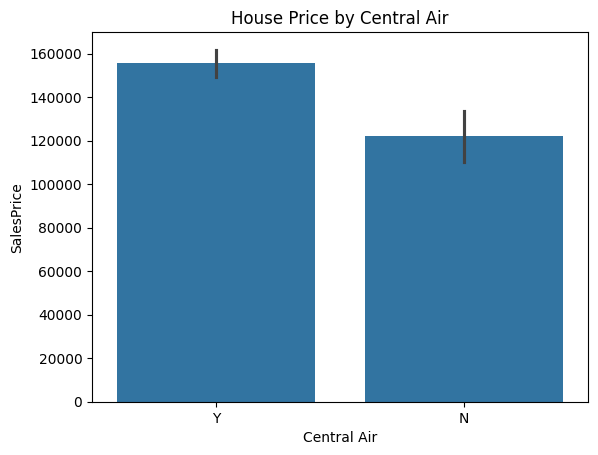

In [25]:
# plt.figure(figsize =(12,12))
sns.barplot(y = df_test["SalesPrice"], x = df_test["Central Air"])
plt.title("House Price by Central Air")


### Overview

Here we see that our model has been able to predict the correct output as shown above

1. We loaded  the  datasets both train set and test set
2. we cleaned the dataset
3. we created the model
4. we evaluated the model to find the loss and accuracy
5. we visualized the loss and accuracy
6. we predicted the model output on the train set
7. we visualized the model output

### About the Author

    Name:  Kaitale Muhammad
    Email: kaitalemuhammad1@gmail.com
    Tel:   +256-780531741